# Improved Breast Cancer Detection using Machine Learning 

## Problem
Accurate and early detection of breast cancer plays a vital role in improving patient outcomes and survival rates. However, existing detection methods often have limitations in terms of accuracy and efficiency. The aim of this project is to develop an advanced breast cancer detection system using Support Vector Machines (SVM) that can effectively classify breast tissue samples as malignant or benign, enabling timely intervention and improved patient care.

## Objective (s)
Develop a breast cancer detection system using Support Vector Machines (SVM) that can accurately classify breast tissue samples as malignant or benign.

In [1]:
# Load libraries
import numpy as np 
import pandas as pd
import researchpy as rp 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# Load dataset
data = pd.read_csv("../data/breast_cancer.csv")
data = data.drop(columns = ['Unnamed: 32', 'id'], axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Exploring Data 

In [3]:
# check shape of data 
data.shape

(569, 31)

In [4]:
# dtypes 
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [5]:
# info 
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [6]:
# check missing data 
data.isnull().sum() 

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Descriptive statistics

In [7]:
# select numeric data 
num_cols = data.select_dtypes(exclude = 'object')
num_cols.head() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
num_cols.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [9]:
# summary statistics of numerical variables 
rp.summary_cont(num_cols[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']])

C:\Users\JHossain\anaconda3\lib\site-packages\researchpy\summary.py:60: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,radius_mean,569.0,14.1273,3.5240,0.1477,13.8371,14.4175
1,texture_mean,569.0,19.2896,4.3010,0.1803,18.9355,19.6438
2,perimeter_mean,569.0,91.9690,24.2990,1.0187,89.9682,93.9698
3,area_mean,569.0,654.8891,351.9141,14.7530,625.9120,683.8662
4,smoothness_mean,569.0,0.0964,0.0141,0.0006,0.0952,0.0975
5,compactness_mean,569.0,0.1043,0.0528,0.0022,0.1000,0.1087
6,concavity_mean,569.0,0.0888,0.0797,0.0033,0.0822,0.0954
7,concave points_mean,569.0,0.0489,0.0388,0.0016,0.0457,0.0521
8,symmetry_mean,569.0,0.1812,0.0274,0.0011,0.1789,0.1834
9,fractal_dimension_mean,569.0,0.0628,0.0071,0.0003,0.0622,0.0634


In [10]:
# select categorical data 
cat_cols = data.select_dtypes(include = 'object')
cat_cols.head() 

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [11]:
cat_cols.columns

Index(['diagnosis'], dtype='object')

In [12]:
# summary statistics of categorical variables 
rp.summary_cat(cat_cols['diagnosis'])

,Variable,Outcome,Count,Percent
0,diagnosis,B,357,62.74
1,,M,212,37.26


## Correlations between Variables 

In [13]:
# correlation: Pearson’s by default 
data.corr(method='pearson')

C:\Users\JHossain\AppData\Local\Temp\ipykernel_10504\427603040.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


## Skewness 

In [14]:
# skew 
data.skew() 

C:\Users\JHossain\AppData\Local\Temp\ipykernel_10504\942340472.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

## Data visualizations

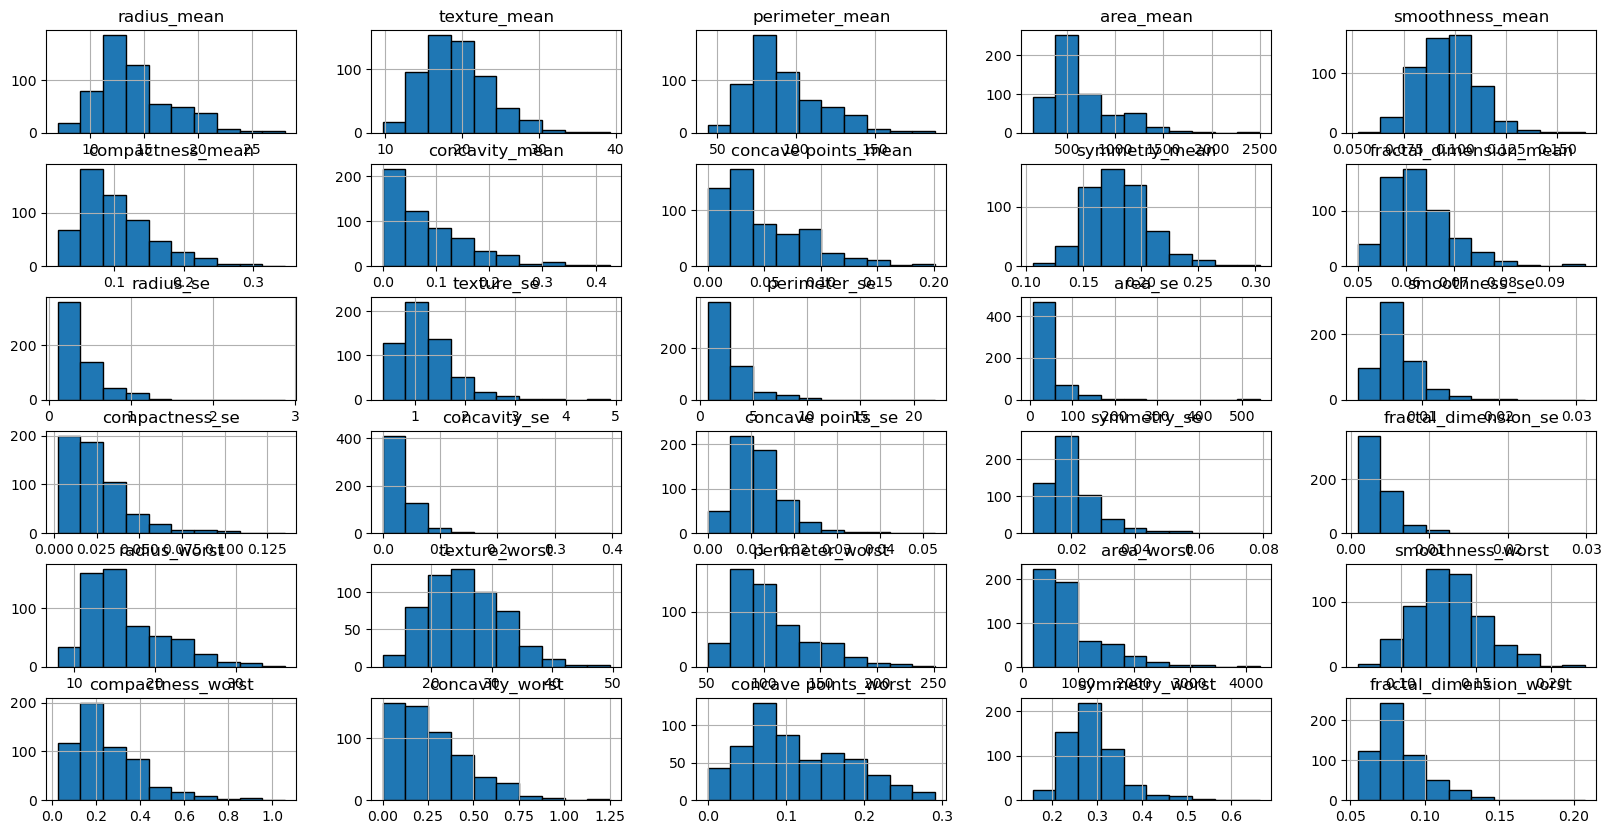

In [15]:
# Univariate distributions with histogram
data.select_dtypes(exclude = "object").hist(figsize=(20,10), edgecolor='black')
plt.show() 

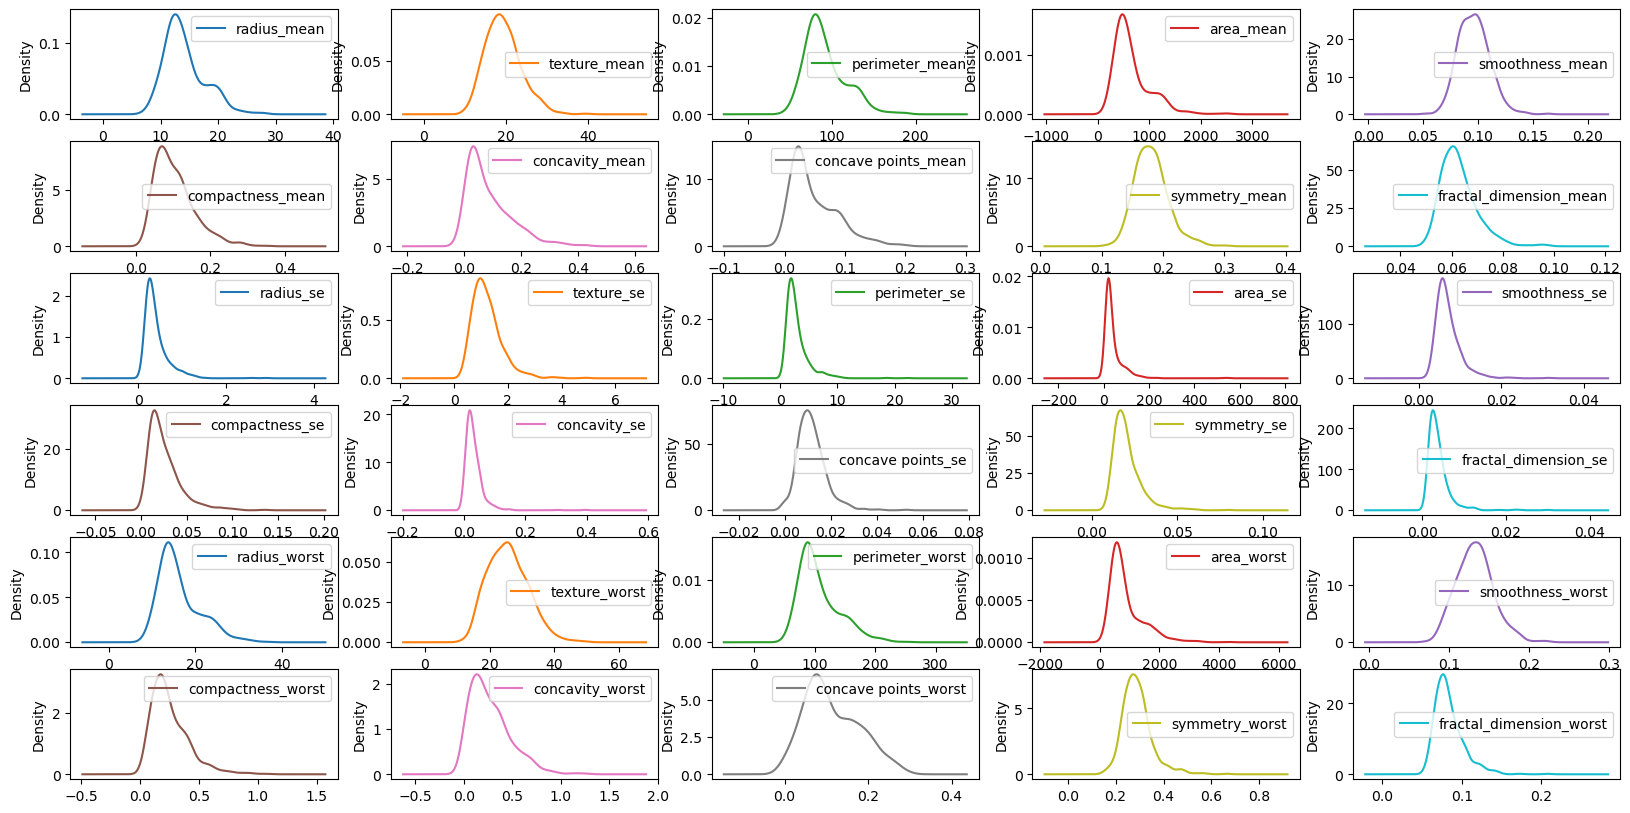

In [16]:
# Univariate distributions with density plot 
data.select_dtypes(exclude = "object").plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(6,5))
plt.show() 

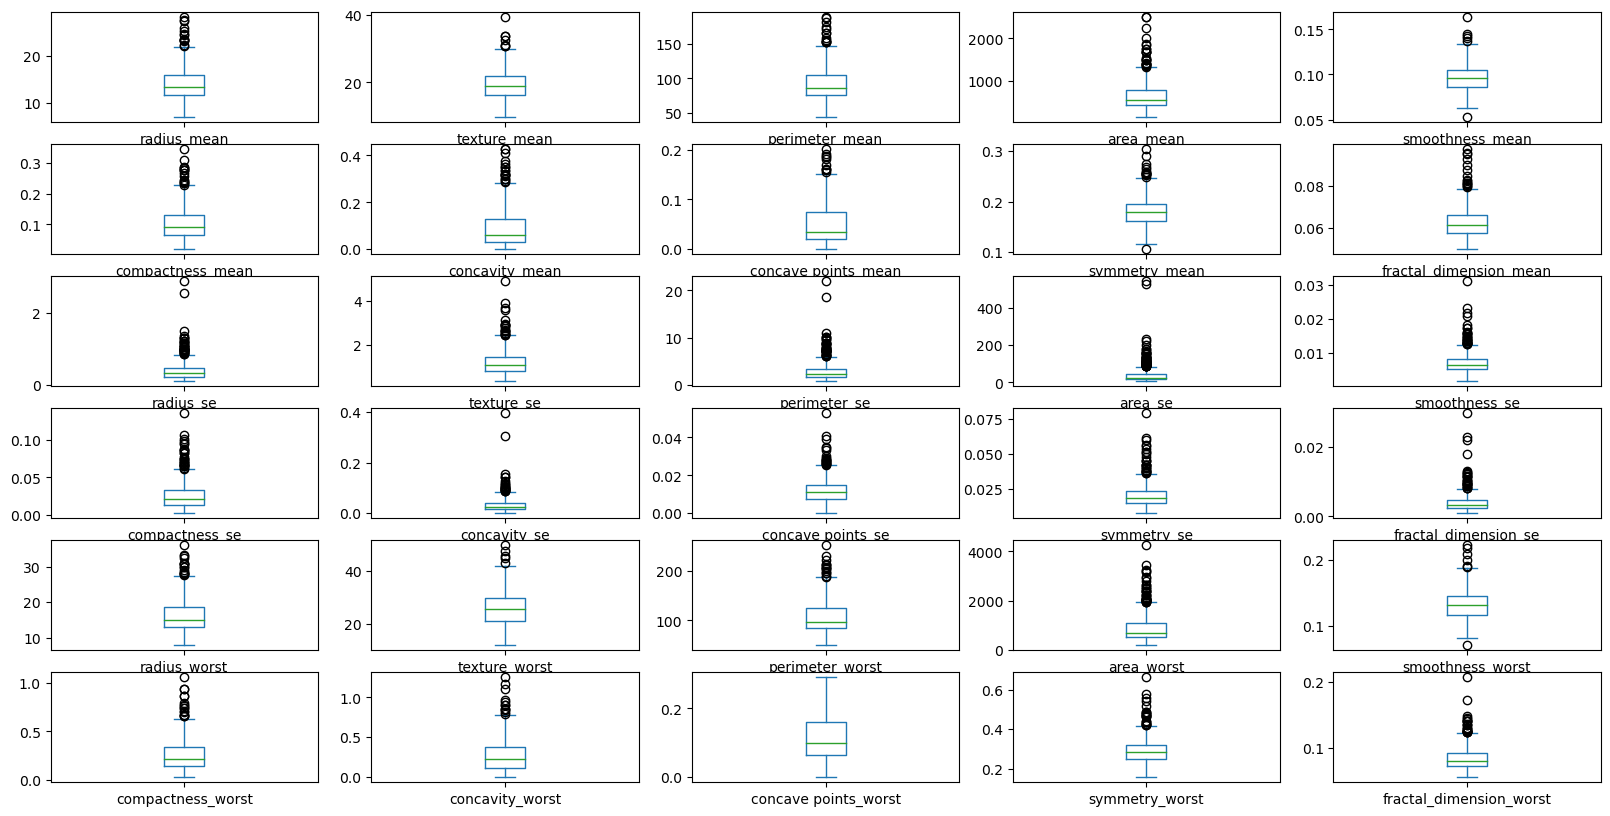

In [17]:
# Univariate distributions with box plots 
data.select_dtypes(exclude = "object").plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(6,5))
plt.show() 

C:\Users\JHossain\AppData\Local\Temp\ipykernel_10504\4023993825.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


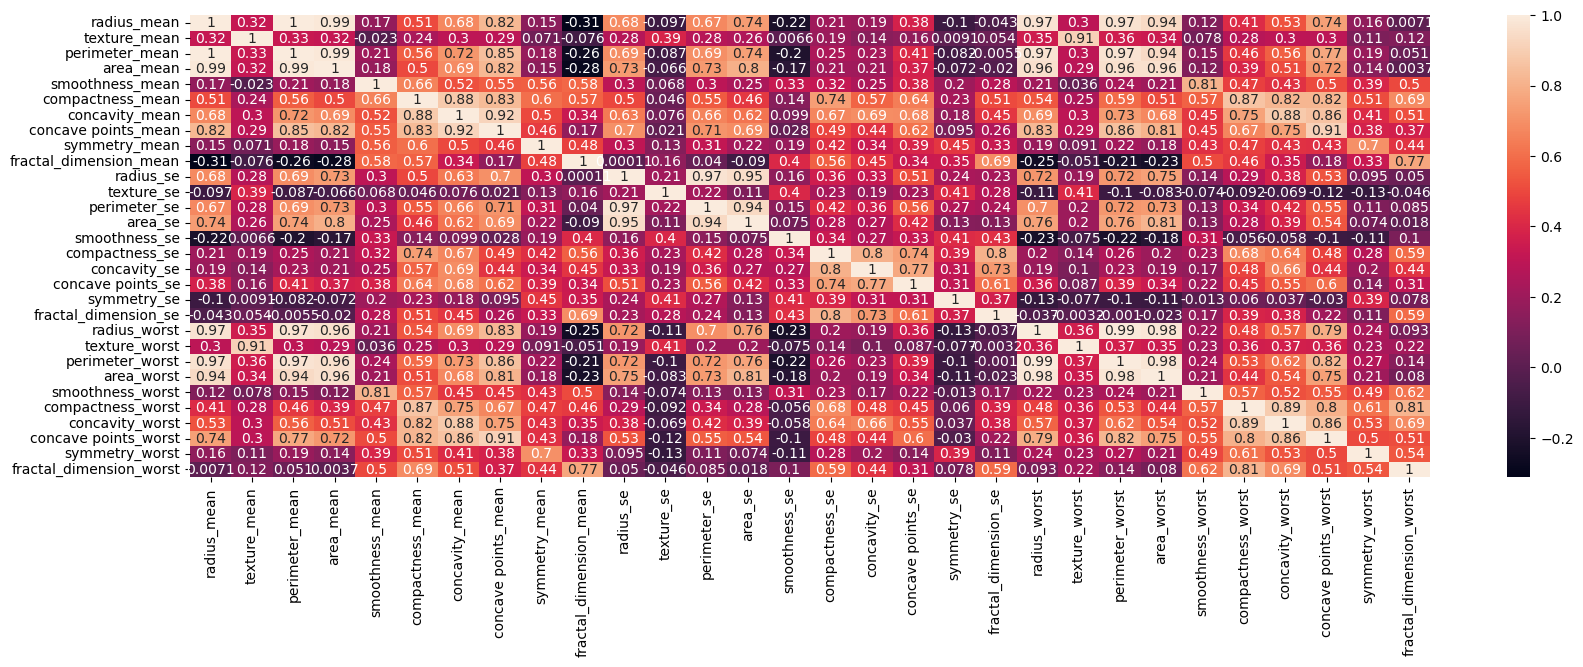

In [18]:
# Multivariate plots with correlations 
plt.figure(figsize=(20,6))
corr = data.corr() 
sns.heatmap(corr, annot=True)
plt.show()

## Setup 

In [19]:
# exmine first few rows of data 
data.head() 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(data, target = 'diagnosis', session_id = 123)

,Description,Value
0,Session id,123
1,Target,diagnosis
2,Target type,Binary
3,Target mapping,"B: 0, M: 1"
4,Original data shape,"(569, 31)"
5,Transformed data shape,"(569, 31)"
6,Transformed train set shape,"(398, 31)"
7,Transformed test set shape,"(171, 31)"
8,Numeric features,30
9,Preprocess,True


## Compare Models 

In [21]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9673,0.9961,0.9329,0.9795,0.9539,0.9287,0.9313,0.4020
ada,Ada Boost Classifier,0.9622,0.9911,0.9395,0.9621,0.9484,0.9187,0.9215,0.3980
lda,Linear Discriminant Analysis,0.9599,0.9920,0.8924,1.0000,0.9412,0.9112,0.9165,0.3920
lightgbm,Light Gradient Boosting Machine,0.9599,0.9926,0.9262,0.9665,0.9437,0.9127,0.9156,0.4900
qda,Quadratic Discriminant Analysis,0.9571,0.9952,0.9390,0.9478,0.9420,0.9080,0.9097,0.3730
gbc,Gradient Boosting Classifier,0.9547,0.9921,0.9390,0.9453,0.9393,0.9033,0.9068,0.4250
rf,Random Forest Classifier,0.9546,0.9939,0.9390,0.9460,0.9397,0.9034,0.9070,0.4410
ridge,Ridge Classifier,0.9497,0.0000,0.8852,0.9788,0.9268,0.8890,0.8944,0.3750
lr,Logistic Regression,0.9473,0.9923,0.9129,0.9514,0.9271,0.8861,0.8916,0.8610
nb,Naive Bayes,0.9346,0.9880,0.8790,0.9470,0.9076,0.8574,0.8630,0.3870


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

## Create Model 

In [22]:
# create model 
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9500,0.9853,0.8667,1.0000,0.9286,0.8904,0.8958
2,0.9250,1.0000,0.8000,1.0000,0.8889,0.8333,0.8452
3,0.9500,1.0000,0.8667,1.0000,0.9286,0.8904,0.8958
4,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9500,0.9960,0.9333,0.9333,0.9333,0.8933,0.8933
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9487,0.9800,0.9286,0.9286,0.9286,0.8886,0.8886


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
# print model parameters
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


## Tune Model 

In [24]:
# tune hyperparameters of rf
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,1.0000,1.0000,0.8824,0.9375,0.8961,0.9010
1,0.9500,0.9733,0.8667,1.0000,0.9286,0.8904,0.8958
2,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
3,0.9500,0.9973,0.8667,1.0000,0.9286,0.8904,0.8958
4,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9750,0.9973,1.0000,0.9375,0.9677,0.9474,0.9487
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8974,0.9800,0.9286,0.8125,0.8667,0.7839,0.7885


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [25]:
# to access the tuner object you can set return_tuner = True
tuned_et, tuner = tune_model(et, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,1.0000,1.0000,0.8824,0.9375,0.8961,0.9010
1,0.9500,0.9733,0.8667,1.0000,0.9286,0.8904,0.8958
2,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
3,0.9500,0.9973,0.8667,1.0000,0.9286,0.8904,0.8958
4,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9750,0.9973,1.0000,0.9375,0.9677,0.9474,0.9487
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.8974,0.9800,0.9286,0.8125,0.8667,0.7839,0.7885


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [26]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [27]:
tuner

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
                                      steps=[('label_encoding',
                                              TransformerWrapperWithInverse(exclude=None,
                                                                            include=None,
                                                                            transformer=LabelEncoder())),
                                             ('numerical_imputer',
                                              TransformerWrapper(exclude=No...
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           160,
                                                                           170,
                                                                           180,
                                                                           190,
                                                                           200,
                                                                           210,
                                                                           220,
                                                                           230,
                                                                           240,
                                                                           250,
                                                                           260,
                                                                           270,
                                                                           280,
                                                                           290,
                                                                           300]},
                   pre_dispatch='2*n_jobs', random

## Analyze Model 

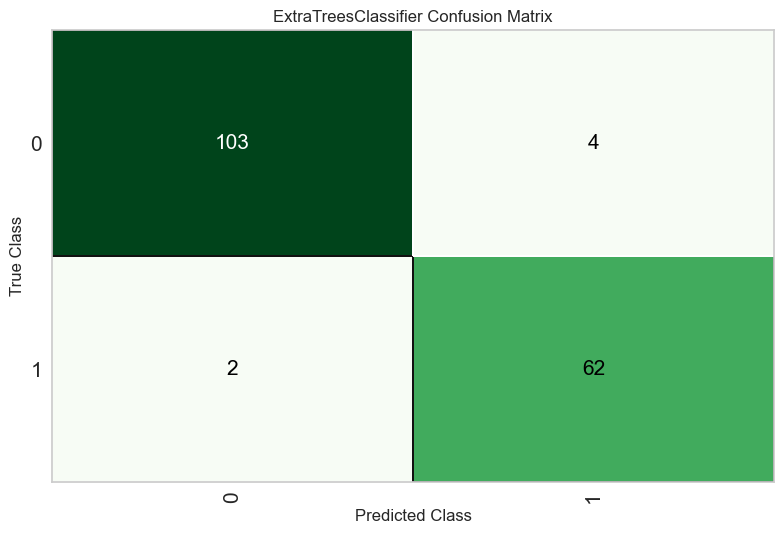

In [28]:
# plot confusion matrix
plot_model(et, plot = 'confusion_matrix')

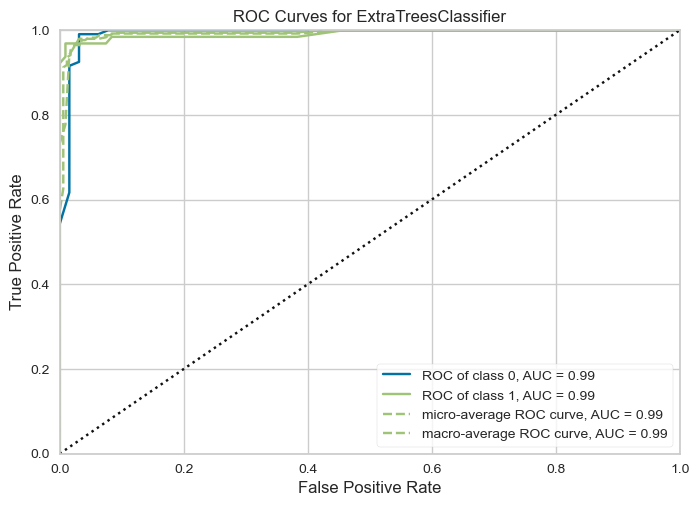

In [29]:
# plot AUC
plot_model(et, plot = 'auc')

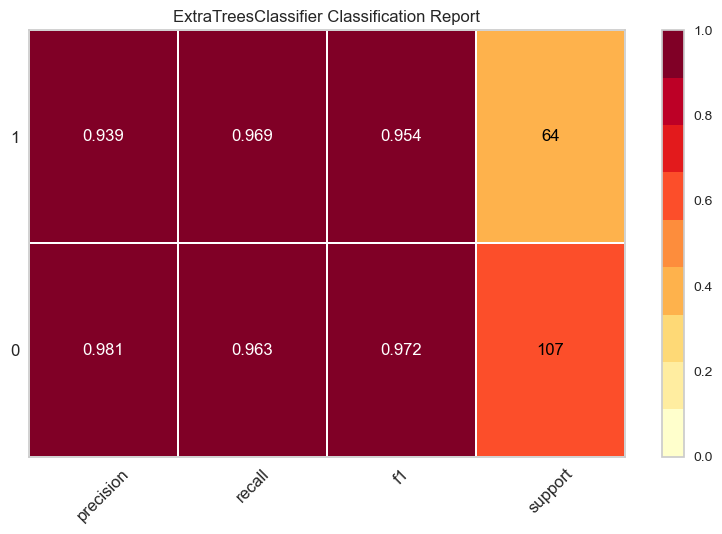

In [30]:
# plot class report
plot_model(et, plot = 'class_report')

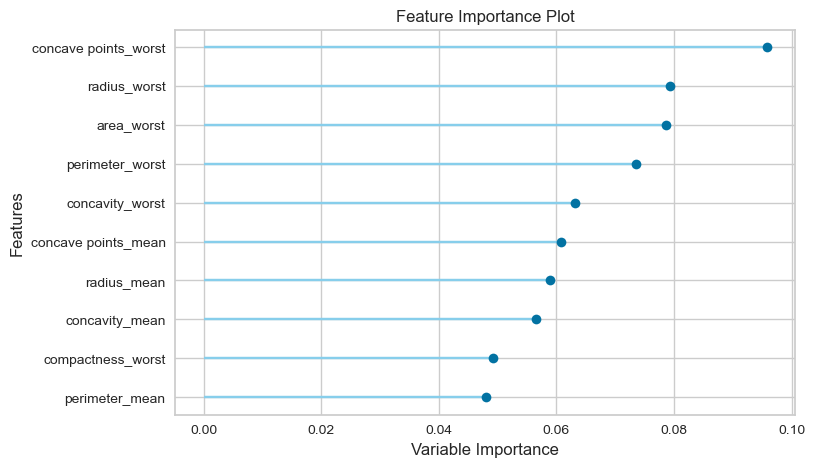

In [31]:
# plot feature importance
plot_model(et, plot = 'feature')

## Evaluate Model 

In [32]:
# evaluate model 
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalize Model 

In [33]:
# finalize a model
finalize_model(et)

Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['radius_mean', 'texture_mean',
                                             'perimeter_mean', 'area_mean',
                                             'smoothness_mean',
                                             'compactness_mean',
                                             'c...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=123,
                                      verbose=0, warm_start=False))],
         verbose=False)

## Prediction

In [34]:
# predict on test set
holdout_pred = predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9649,0.9918,0.9688,0.9394,0.9538,0.9256,0.9258


In [35]:
# show predictions df
holdout_pred.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis,prediction_label,prediction_score
115,11.930000,21.530001,76.529999,438.600006,0.09768,0.07849,0.03328,0.02008,0.1688,0.06194,...,583.000000,0.15000,0.2399,0.15030,0.07247,0.2438,0.08541,0,B,0.99
21,9.504000,12.440000,60.340000,273.899994,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905,...,314.899994,0.13240,0.1148,0.08867,0.06227,0.2450,0.07773,0,B,1.00
382,12.050000,22.719999,78.750000,447.799988,0.06935,0.10730,0.07943,0.02978,0.1203,0.06659,...,488.399994,0.08799,0.3214,0.29120,0.10920,0.2191,0.09349,0,B,0.93
136,11.710000,16.670000,74.720001,423.600006,0.10510,0.06095,0.03592,0.02600,0.1339,0.05945,...,546.700012,0.12710,0.1028,0.10460,0.06968,0.1712,0.07343,0,B,0.98
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,1709.000000,0.14440,0.4245,0.45040,0.24300,0.3613,0.08758,1,M,1.00


In [37]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('diagnosis', axis=1, inplace=True)
new_data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [38]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,prediction_label,prediction_score
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.600006,2019.000000,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M,1.00
1,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.800003,1956.000000,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M,1.00
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.500000,1709.000000,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M,1.00
3,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.870003,567.700012,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M,0.85
4,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.199997,1575.000000,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M,1.00


## Save Model 

In [39]:
# save pipeline
save_model(et, '../models/breast_cancer')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['radius_mean', 'texture_mean',
                                              'perimeter_mean', 'area_mean',
                                              'smoothness_mean',
                                              'compactness_mean',
                                              'c...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                                       max_leaf_nodes=None, max_samples=None,

In [40]:
# load pipeline
loaded_best_pipeline = load_model('../models/breast_cancer')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\JHossain\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['radius_mean', 'texture_mean',
                                             'perimeter_mean', 'area_mean',
                                             'smoothness_mean',
                                             'compactness_mean',
                                             'c...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      n_estimators=100, n_jobs=-1,
                                      oob_score=False, random_state=123,
                                      verbose=0, warm_start=False))],
         verbose=False)